<a href="https://colab.research.google.com/github/anna-klales/Python_S1b2020/blob/master/StaticHuygens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Just run three cells below by clicking in each cell and pressing shift-enter

In [28]:
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi

In [65]:
def calc_wave(k,w,L,point_sources):
    xL = 1*L
    yL = 1*L
    nx = 1000
    ny = 1000

    # set up domain
    xx = np.linspace(-xL/2,xL/2,nx)
    yy = np.linspace(-yL/2,yL/2,ny)
    XX,YY = np.meshgrid(xx,yy)

    # calculate the waves
    
    psi_tot = np.zeros_like(XX)


    for pos in point_sources:

        [x0,y0] = pos
        
        r = np.sqrt((XX-x0)**2 + (YY-y0)**2)
        psi = np.exp(1j*(k*r))/(r)
        psi_tot = psi_tot + psi

    return (psi_tot,XX,YY)




def plot_point_sources(ax,point_sources):

    for pos in point_sources:
        [x,y] = pos
        ax.plot(x,y,'k.',markersize=5)




def sources_manual():

    point_sources = []
    r1 = np.array([0,0.1])
    r2 = np.array([0,-wavelength/2])
    point_sources.append(r1)
    point_sources.append(r2)

    return point_sources



def sources_line(length,N):

    point_sources = []    
    yy = np.linspace(-length/2,length/2,N)
    for y in yy:

        r = np.array([0,y])
        point_sources.append(r)
    return point_sources



def sources_circle(N,radius):

    point_sources = []
    thetas = np.linspace(0,2*pi-2*pi/N,N)
    xx = radius*np.cos(thetas)
    yy = radius*np.sin(thetas)
    for x,y in zip(xx,yy):
        pos = np.array([x,y])
        point_sources.append(pos)
    return point_sources



def sources_doubleslit(d,L):

    point_sources = [np.array([d/2,L/2]),np.array([-d/2,L/2])]


    return point_sources
    


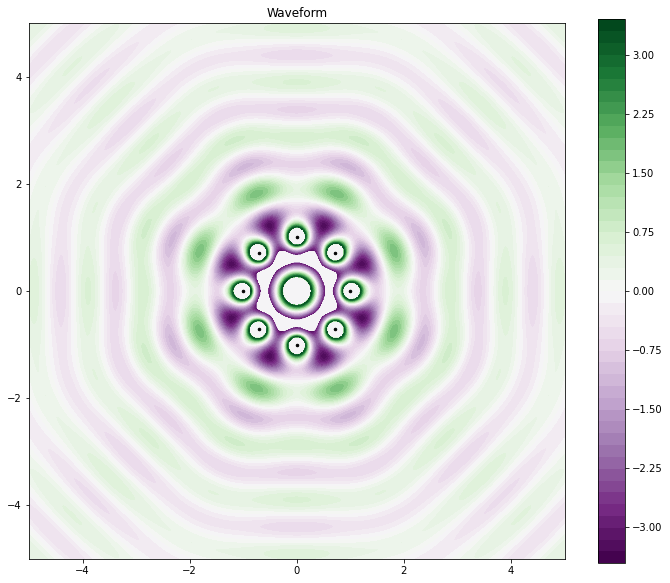

In [71]:

def initialize_constants():

    wavelength = 1
    frequency = 2
    # set domain size in units of wavelengths
    L = 10 # size of domain

    k = 2*pi/wavelength
    w = 2*pi*frequency

    return(wavelength,k,w,L)




################################################################
# initialize constants
[wavelength,k,w,L] = initialize_constants()


################################################################
# set up the point sources.  choose from following options:

#point_sources = sources_doubleslit(wavelength,L)
point_sources = sources_circle(8,wavelength)
#point_sources = sources_line(2*wavelength,8)


################################################################
# calculate the wave:
[psi_tot,XX,YY]  =   calc_wave(k,w,L,point_sources)


################################################################

# take just the real part:
real_part = np.real(psi_tot)


# plot it.  If it's too dim, change rescale to a lower value
rescale = .8
clip = -np.min(real_part)*rescale
real_part[real_part>clip]=0
real_part[real_part<-clip]=0


# Make the plot
fig,ax = plt.subplots()
fig.set_size_inches(12,10)

im = ax.contourf(XX,YY,real_part,50,cmap='PRGn')
fig.colorbar(im,ax=ax)

# Indicate where the point sources are
plot_point_sources(ax,point_sources)

ax.set_aspect(1)
ax.set_title('Waveform');